In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab
import scipy.stats as stats
import math
import json as j
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
%matplotlib inline

In [32]:
# Upload the data
airbnb = pd.read_csv('Airbnb.csv')
host_name = ['host_name']
#airbnb.replace('host_name')

In [33]:
import pickle

#airbnb = {}
#for i, c in enumerate(host_name):
#    with open("Airbnb.csv","rb") as file:
#       file.seek(0)
#        airbnb=pickle.load(file)


In [34]:
next(iter(airbnb.keys()))


'id'

In [35]:
# Clean the data, drop outliers and missing values
# Also dropped all the varues for price=0
airbnb1=airbnb[airbnb['price']<1000]
airbnb=airbnb1[airbnb1['price']>0]
airbnb.dropna()

,id,name,host_id,host_name,host_since,host_is_superhost,host_identity_verified,instant_bookable,accommodates,amenities,...,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,27-06-2008,f,t,f,6,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""...",...,2.0,3.0,115,30,730,2,15-05-2016,0.02,1,216
1,2708,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,3008,Chas.,16-09-2008,t,t,t,1,"[""Host greets you"", ""Elevator"", ""Air condition...",...,1.0,1.0,71,30,366,27,06-10-2020,0.35,2,360
2,2732,Zen Life at the Beach,3041,Yoga Priestess,17-09-2008,f,t,f,1,"[""Cooking basics"", ""Host greets you"", ""Smoke a...",...,1.0,1.0,155,1,180,21,27-12-2019,0.18,2,337
4,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,05-03-2009,t,t,f,2,"[""Lock on bedroom door"", ""Fire extinguisher"", ...",...,1.0,1.0,60,30,1125,310,29-04-2020,2.25,5,337
5,5729,Zen Room with Floating Bed near Venice and LAX,9171,Sanni,05-03-2009,t,t,f,3,"[""Smoke alarm"", ""Private entrance"", ""Free stre...",...,1.0,1.0,70,30,1125,230,11-04-2020,1.69,5,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158070,45653683,Rose Garden Room - 2 Queen Beds for up to 4 pe...,258796003,Julia,29-04-2019,f,t,f,4,"[""Shampoo"", ""Smoke alarm"", ""Laptop-friendly wo...",...,1.0,2.0,25,1,13,1,08-10-2020,1.00,38,7
158090,45690041,Downtown Urban Luxury,109283396,Alex,01-01-2017,t,t,t,3,"[""Conditioner"", ""Iron"", ""TV"", ""Hangers"", ""Tras...",...,1.0,2.0,112,3,30,1,09-10-2020,1.00,1,336
158091,45691352,New modern unit in Seattle,209532998,Sam,14-08-2018,f,t,t,2,"[""Conditioner"", ""Iron"", ""TV"", ""Hangers"", ""Priv...",...,1.0,1.0,57,1,365,5,22-10-2020,5.00,2,103
158155,45790522,Breathtaking City View Apartment with HUGE Deck,371227093,Lily,09-10-2020,f,t,f,7,"[""Baby bath"", ""Bathtub"", ""Iron"", ""TV"", ""Hanger...",...,2.0,4.0,191,2,1125,3,19-10-2020,3.00,1,166


In [36]:
# Descriptive stats
airbnb.describe()

,id,host_id,accommodates,latitude,longitude,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.552950e+05,1.552950e+05,155295.000000,155295.000000,155295.000000,155151.000000,138802.000000,154061.000000,155295.000000,1.552950e+05,1.552950e+05,155295.000000,120414.000000,155295.000000,155295.000000
mean,2.683857e+07,9.933147e+07,3.768293,34.756481,-106.536595,1.393552,1.589919,2.032903,162.700544,6.579926e+02,1.594105e+04,110.672314,1.372128,18.854619,177.065997
std,1.392679e+07,1.044339e+08,2.518395,6.922759,27.916644,0.753512,0.949622,1.640416,142.651165,2.537589e+05,5.461700e+06,274.733931,1.643254,48.967256,139.113964
min,1.090000e+02,4.700000e+02,0.000000,18.928570,-159.722130,0.000000,1.000000,0.000000,10.000000,1.000000e+00,0.000000e+00,0.000000,0.010000,1.000000,0.000000
25%,1.572256e+07,1.473692e+07,2.000000,32.855970,-121.920285,1.000000,1.000000,1.000000,75.000000,2.000000e+00,3.000000e+01,1.000000,0.220000,1.000000,35.000000
50%,2.816512e+07,5.428252e+07,3.000000,36.128860,-117.154100,1.000000,1.000000,2.000000,120.000000,3.000000e+00,3.650000e+02,12.000000,0.760000,2.000000,173.000000
75%,3.984784e+07,1.568241e+08,5.000000,40.688360,-77.001485,2.000000,2.000000,3.000000,199.000000,3.000000e+01,1.125000e+03,62.000000,1.990000,8.000000,326.000000
max,4.694186e+07,3.791734e+08,16.000000,47.734890,-73.710870,50.000000,27.000000,51.000000,999.000000,1.000000e+08,2.147484e+09,1825.000000,37.280000,386.000000,365.000000


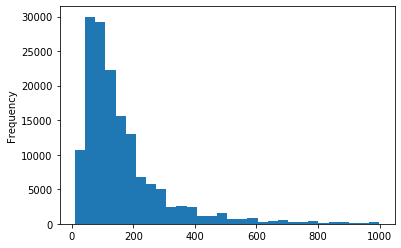

In [37]:
# Price distribution
airbnb['price'].plot.hist( bins=30)

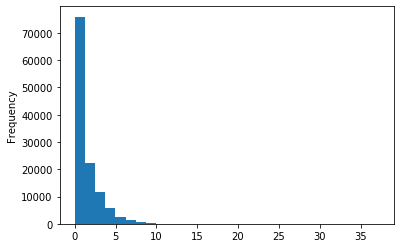

In [38]:
# Review distribution
airbnb['reviews_per_month'].plot.hist( bins=30)

In [39]:
# Dropped all the categorical and irrelevant variables for the correlation figure
airbnb = airbnb.drop('id', axis=1)
airbnb = airbnb.drop('host_id', axis=1)
airbnb1 = airbnb.drop('host_name', axis=1)
airbnb1 = airbnb.drop('name', axis=1)
airbnb = airbnb.drop('host_since', axis=1)
airbnb = airbnb.drop('host_is_superhost', axis=1)
airbnb = airbnb.drop('host_identity_verified', axis=1)
airbnb = airbnb.drop('instant_bookable', axis=1)
airbnb1 = airbnb.drop('amenities', axis=1)
airbnb = airbnb.drop('State', axis=1)
airbnb = airbnb.drop('neighbourhood_group', axis=1)
airbnb = airbnb.drop('neighbourhood', axis=1)
airbnb = airbnb.drop('latitude', axis=1)
airbnb = airbnb.drop('longitude', axis=1)
airbnb = airbnb.drop('property_type', axis=1)
airbnb = airbnb.drop('room_type', axis=1)
airbnb = airbnb.drop('last_review', axis=1)
airbnb = airbnb.drop('calculated_host_listings_count', axis=1)
airbnb = airbnb.drop('availability_365', axis=1)
airbnb = airbnb.drop('reviews_per_month', axis=1)
airbnb.head()

,name,host_name,accommodates,amenities,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,Amazing bright elegant condo park front *UPGRA...,Paolo,6,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""...",2.0,2.0,3.0,115,30,730,2
1,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Chas.,1,"[""Host greets you"", ""Elevator"", ""Air condition...",1.5,1.0,1.0,71,30,366,27
2,Zen Life at the Beach,Yoga Priestess,1,"[""Cooking basics"", ""Host greets you"", ""Smoke a...",1.0,1.0,1.0,155,1,180,21
3,* Beautiful Master Suite/Jacuzzi Tub/*,Bernadine,2,"[""Host greets you"", ""Air conditioning"", ""Carbo...",1.0,1.0,1.0,50,30,730,0
4,Tiny Home in Artistic Oasis near Venice and LAX,Sanni,2,"[""Lock on bedroom door"", ""Fire extinguisher"", ...",1.0,1.0,1.0,60,30,1125,310


In [40]:
airbnb.isna().sum().sum()

17915

In [41]:
airbnb.dropna(inplace=True)
airbnb.head()

,name,host_name,accommodates,amenities,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,Amazing bright elegant condo park front *UPGRA...,Paolo,6,"[""Elevator"", ""Cable TV"", ""Air conditioning"", ""...",2.0,2.0,3.0,115,30,730,2
1,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Chas.,1,"[""Host greets you"", ""Elevator"", ""Air condition...",1.5,1.0,1.0,71,30,366,27
2,Zen Life at the Beach,Yoga Priestess,1,"[""Cooking basics"", ""Host greets you"", ""Smoke a...",1.0,1.0,1.0,155,1,180,21
3,* Beautiful Master Suite/Jacuzzi Tub/*,Bernadine,2,"[""Host greets you"", ""Air conditioning"", ""Carbo...",1.0,1.0,1.0,50,30,730,0
4,Tiny Home in Artistic Oasis near Venice and LAX,Sanni,2,"[""Lock on bedroom door"", ""Fire extinguisher"", ...",1.0,1.0,1.0,60,30,1125,310


Text(0.5, 1, '')

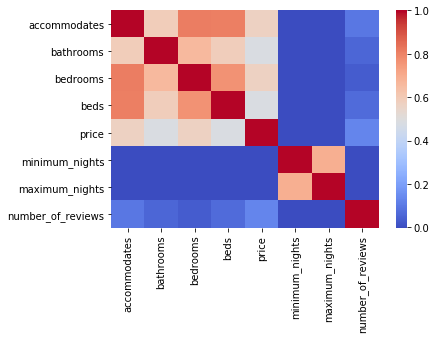

In [18]:
# This shows the correlation between the variables
sns.heatmap(airbnb.corr(),cmap='coolwarm')
plt.title('')

In [19]:
next(iter(airbnb.keys()))

'name'

In [55]:
import re
import string

def clean_text_round(text):
    
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round(x)


In [56]:
data_clean = pd.DataFrame(airbnb['name'].apply(round))
data_clean

TypeError: type str doesn't define __round__ method

In [23]:
def clean_text_round2(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [24]:
airbnb = pd.DataFrame(airbnb['amenities'].apply(round2))
airbnb

,amenities
0,elevator cable tv air conditioning carbon mono...
1,host greets you elevator air conditioning carb...
2,cooking basics host greets you smoke alarm pat...
3,host greets you air conditioning carbon monoxi...
4,lock on bedroom door fire extinguisher carbon ...
...,...
158244,hot water wifi shampoo smoke alarm fire exting...
158245,hot water wifi shampoo fire extinguisher smoke...
158246,hot water wifi shampoo fire extinguisher smoke...
158247,hot water wifi shampoo smoke alarm fire exting...


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(airbnb)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = airbnb.index
data_dtm

ValueError: Length mismatch: Expected axis has 11 elements, new values have 137596 elements

In [43]:
xmat=airbnb.drop('price',axis=1)
y=airbnb['price']

In [44]:

xmat=airbnb.drop('price',axis=1)
y=airbnb['price']
X_train, X_test, y_train, y_test=train_test_split(xmat,y,test_size=0.3,random_state=3)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [47]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

ValueError: could not convert string to float: 'Best location in downtown Hollywood'

In [3]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [58]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
customized = ['in', 'of', 'at', 'a', 'the']

def processed_reviews(comments, customized):
    processed_reviews = comments
    processed_reviews.replace('[^\w\s]','')
    processed_reviews.replace('[^\w\s]','')
    processed_reviews = " ".join(word for word in processed_reviews.split() if word not in stop_words)
    processed_reviews = " ".join(word for word in processed_reviews.split() if word not in customized)
    processed_reviews = " ".join([lemmatizer.lemmatize(w) for w in processed_reviews.split()])
    
    
    return(processed_reviews)

reviews['processed_reviews'] = reviews['comments'].apply(lambda x: processed_reviews(x, customized))
reviews['processed_reviews']

[nltk_data] Downloading package stopwords to C:\Users\Magda
[nltk_data]     Kondaridze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Magda
[nltk_data]     Kondaridze\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


AttributeError: 'float' object has no attribute 'replace'